In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [41]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_column", None)

In [42]:
import pandas as pd
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
def makeFipsData():
    df_fips = pd.read_csv("datasets/fips_codes.csv")
    df_fips = df_fips.dropna().reset_index()
    df_fips = df_fips.drop(columns="index")
    df_fips['state'] = df_fips['state'].map(state_map)
    df_fips["County"] = df_fips["name"] + ", " + df_fips['state']
    return df_fips
def cleanAlzData(fileName):
    df = pd.read_csv("datasets/" + fileName)
    df = df.drop(columns=["Unnamed: 0"])
    df_fips = makeFipsData()
    df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']] = df['Prevalence, % (95%CI)'].str.extract(r'([\d.]+) \(([\d.]+), ([\d.]+)\)')
    df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']] = df['No. (95%CI) of people with AD, in thousands'].str.extract(r'([\d.]+) \(([\d.]+), ([\d.]+)\)')
    df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']] = df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']].astype(float)
    df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']] = df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']].astype(float)
    df = pd.merge(df, df_fips, how="inner", on="County")
    df.insert(1, "FIPS", df.pop("fips"))
    return df

def cleanCancerData(fileName):
    df = pd.read_csv("datasets/" + fileName, skiprows=8)
    df = df.dropna()
    df.index -= 1
    df = df[(df["Lower 95% Confidence Interval"] != "data not available") & (df["Average Annual Count"] != "3 or fewer")]
    #Must include when initializing dataframe:
    df = df.drop(columns=["Lower CI (CI*Rank)", "CI*Rank([rank note])", "Upper CI (CI*Rank)"])
    df["County"] = df["County"].str[:-3]
    return df

In [43]:
df_fips = makeFipsData()
df_fips.head(10)

,fips,name,state,County
0,1001,Autauga County,Alabama,"Autauga County, Alabama"
1,1003,Baldwin County,Alabama,"Baldwin County, Alabama"
2,1005,Barbour County,Alabama,"Barbour County, Alabama"
3,1007,Bibb County,Alabama,"Bibb County, Alabama"
4,1009,Blount County,Alabama,"Blount County, Alabama"
5,1011,Bullock County,Alabama,"Bullock County, Alabama"
6,1013,Butler County,Alabama,"Butler County, Alabama"
7,1015,Calhoun County,Alabama,"Calhoun County, Alabama"
8,1017,Chambers County,Alabama,"Chambers County, Alabama"
9,1019,Cherokee County,Alabama,"Cherokee County, Alabama"


In [44]:
df = cleanAlzData("alz13081-sup-0004-table2.csv")
df.head(10)

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,95% CI Low Prevalence%,95% CI High Prevalence%,Mean Diagnosis Count,95% CI Low Diagnosis Count,95% CI High Diagnosis Count,name,state
0,"Autauga County, Alabama",1001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,10.8,11.9,1.0,1.0,1.1,Autauga County,Alabama
1,"Baldwin County, Alabama",1003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,9.5,10.5,4.9,4.7,5.2,Baldwin County,Alabama
2,"Barbour County, Alabama",1005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,12.9,14.1,0.7,0.6,0.7,Barbour County,Alabama
3,"Bibb County, Alabama",1007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,10.8,11.9,0.4,0.4,0.5,Bibb County,Alabama
4,"Blount County, Alabama",1009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,9.6,10.7,1.1,1.1,1.2,Blount County,Alabama
5,"Bullock County, Alabama",1011,1.8,"16.7 (16, 17.4)","0.3 (0.3, 0.3)",11.8,56.2,64.5,1.8,16.7,16.0,17.4,0.3,0.3,0.3,Bullock County,Alabama
6,"Butler County, Alabama",1013,4.2,"14.5 (13.9, 15.1)","0.6 (0.6, 0.6)",13.9,59.1,33.9,0.7,14.5,13.9,15.1,0.6,0.6,0.6,Butler County,Alabama
7,"Calhoun County, Alabama",1015,21.0,"11.1 (10.6, 11.7)","2.3 (2.2, 2.5)",10.2,57.2,14.9,1.3,11.1,10.6,11.7,2.3,2.2,2.5,Calhoun County,Alabama
8,"Chambers County, Alabama",1017,6.8,"13 (12.4, 13.6)","0.9 (0.8, 0.9)",10.9,57.1,31.5,0.9,13.0,12.4,13.6,0.9,0.8,0.9,Chambers County,Alabama
9,"Cherokee County, Alabama",1019,6.4,"10.1 (9.6, 10.6)","0.6 (0.6, 0.7)",9.5,52.8,4.0,0.6,10.1,9.6,10.6,0.6,0.6,0.7,Cherokee County,Alabama


In [45]:
df_cancer = cleanCancerData("incd_us.csv")
df_cancer.head(20)

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"Union County, Florida",12125.0,Rural,1248.4,1177.5,1322.7,245,stable,0.4,-0.6,1.5
1,"Traverse County, Minnesota",27155.0,Rural,693.5,588.2,814.3,37,stable,2.2,-0.9,5.5
2,"Polk County, Texas",48373.0,Rural,679.5,648.4,711.8,436,stable,-0.3,-3.1,2.5
3,"Galax City, Virginia",51640.0,Rural,655,577.7,740.2,55,stable,1.7,-0.7,4.0
4,"Greeley County, Nebraska",31077.0,Rural,653.1,519.4,812.5,21,stable,0.7,-2.3,3.6
5,"Dewey County, South Dakota",46041.0,Rural,634.5,528.9,754.2,28,stable,1.3,-0.8,3.6
6,"Quitman County, Mississippi",28119.0,Rural,626.5,549.7,711.6,52,rising,2.5,1.0,4.1
7,"Wheatland County, Montana",30107.0,Rural,626,500.5,777,19,rising,9.5,2.2,27.1
8,"Faulk County, South Dakota",46049.0,Rural,625.3,500.9,774.5,21,rising,3.0,1.0,5.2
9,"Stonewall County, Texas",48433.0,Rural,621.1,459.8,827.3,12,stable,2.0,-1.3,5.5


In [46]:
df_cancermerge = df_cancer[["FIPS", "Average Annual Count", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]]
df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Average Annual Count"]
df_cancermerge["Cancer Rate"] = df_cancermerge["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]
df_cancermerge = df_cancermerge.drop(columns=["Average Annual Count", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"])
df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Cancer Avg. Count"].astype(float)
df_cancermerge["Cancer Rate"] = df_cancermerge["Cancer Rate"].astype(float)
df_cancermerge.head(10)

/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_24935/4070650627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Average Annual Count"]
/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_24935/4070650627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancermerge["Cancer Rate"] = df_cancermerge["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]


,FIPS,Cancer Avg. Count,Cancer Rate
0,12125.0,245.0,1248.4
1,27155.0,37.0,693.5
2,48373.0,436.0,679.5
3,51640.0,55.0,655.0
4,31077.0,21.0,653.1
5,46041.0,28.0,634.5
6,28119.0,52.0,626.5
7,30107.0,19.0,626.0
8,46049.0,21.0,625.3
9,48433.0,12.0,621.1


In [47]:
df = pd.merge(df, df_cancermerge, how="inner", on="FIPS")
df.head(10)

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,95% CI Low Prevalence%,95% CI High Prevalence%,Mean Diagnosis Count,95% CI Low Diagnosis Count,95% CI High Diagnosis Count,name,state,Cancer Avg. Count,Cancer Rate
0,"Autauga County, Alabama",1001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,10.8,11.9,1.0,1.0,1.1,Autauga County,Alabama,324.0,459.5
1,"Baldwin County, Alabama",1003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,9.5,10.5,4.9,4.7,5.2,Baldwin County,Alabama,1450.0,442.5
2,"Barbour County, Alabama",1005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,12.9,14.1,0.7,0.6,0.7,Barbour County,Alabama,158.0,444.5
3,"Bibb County, Alabama",1007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,10.8,11.9,0.4,0.4,0.5,Bibb County,Alabama,128.0,444.8
4,"Blount County, Alabama",1009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,9.6,10.7,1.1,1.1,1.2,Blount County,Alabama,319.0,410.1
5,"Bullock County, Alabama",1011,1.8,"16.7 (16, 17.4)","0.3 (0.3, 0.3)",11.8,56.2,64.5,1.8,16.7,16.0,17.4,0.3,0.3,0.3,Bullock County,Alabama,57.0,434.2
6,"Butler County, Alabama",1013,4.2,"14.5 (13.9, 15.1)","0.6 (0.6, 0.6)",13.9,59.1,33.9,0.7,14.5,13.9,15.1,0.6,0.6,0.6,Butler County,Alabama,122.0,460.9
7,"Calhoun County, Alabama",1015,21.0,"11.1 (10.6, 11.7)","2.3 (2.2, 2.5)",10.2,57.2,14.9,1.3,11.1,10.6,11.7,2.3,2.2,2.5,Calhoun County,Alabama,733.0,493.2
8,"Chambers County, Alabama",1017,6.8,"13 (12.4, 13.6)","0.9 (0.8, 0.9)",10.9,57.1,31.5,0.9,13.0,12.4,13.6,0.9,0.8,0.9,Chambers County,Alabama,215.0,435.9
9,"Cherokee County, Alabama",1019,6.4,"10.1 (9.6, 10.6)","0.6 (0.6, 0.7)",9.5,52.8,4.0,0.6,10.1,9.6,10.6,0.6,0.6,0.7,Cherokee County,Alabama,163.0,421.5


In [48]:
df["Relationship"] = df["Cancer Rate"]/df["Mean Prevalence%"]

In [49]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
# X is alzheimers, Y is cancer
X_train, X_test = train_test_split(df["Mean Diagnosis Count"], train_size=0.8, test_size=0.2, random_state=100)
Y_train, Y_test = train_test_split(df["Cancer Avg. Count"], train_size=0.8, test_size=0.2, random_state=100)

In [50]:
X_train.head(10)

455     0.7
1013    1.7
1775    0.8
2765    0.7
1834    0.5
2808    0.6
2486    0.4
1686    0.7
2229    0.6
2894    2.3
Name: Mean Diagnosis Count, dtype: float64

In [51]:
Y_train.head(10)

455     177.0
1013    461.0
1775    149.0
2765    185.0
1834    191.0
2808    185.0
2486     88.0
1686    170.0
2229    250.0
2894    725.0
Name: Cancer Avg. Count, dtype: float64

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(Y_train, X_train_lm).fit()

print(lr.summary())

Y_pred = lr.predict(X_test_lm)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

                            OLS Regression Results                            
Dep. Variable:      Cancer Avg. Count   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 8.601e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:48:40   Log-Likelihood:                -16312.
No. Observations:                2344   AIC:                         3.263e+04
Df Residuals:                    2342   BIC:                         3.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   81.9165 

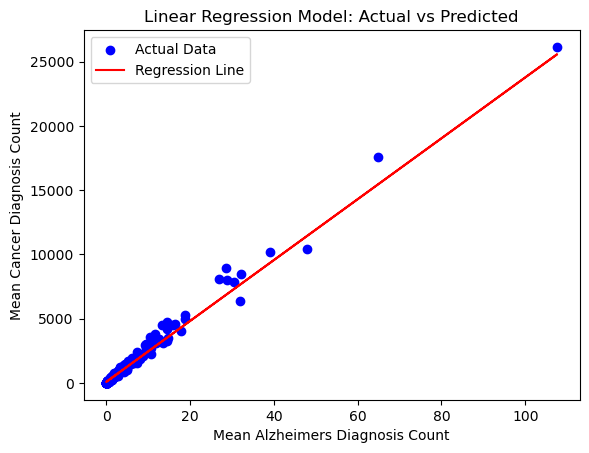

In [53]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plotting the regression line (using the predicted values)
plt.plot(X_test, Y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Mean Alzheimers Diagnosis Count')
plt.ylabel('Mean Cancer Diagnosis Count')
plt.title('Linear Regression Model: Actual vs Predicted')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
# X is alzheimers, Y is cancer
X_train, X_test = train_test_split(df["Mean Prevalence%"], train_size=0.8, test_size=0.2, random_state=50)
Y_train, Y_test = train_test_split(df["Cancer Rate"], train_size=0.8, test_size=0.2, random_state=50)

In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(Y_train, X_train_lm).fit()

print(lr.summary())

Y_pred = lr.predict(X_test_lm)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared
corr = df[["Mean Prevalence%", "Cancer Rate"]].corr().iat[0, 1]

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Correlation Coefficient", corr)

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.315
Time:                        19:48:40   Log-Likelihood:                -12948.
No. Observations:                2344   AIC:                         2.590e+04
Df Residuals:                    2342   BIC:                         2.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              444.9140      9.667  

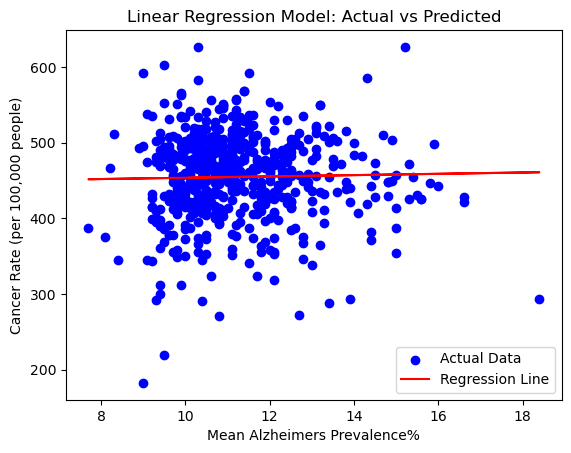

In [56]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plotting the regression line (using the predicted values)
plt.plot(X_test, Y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Mean Alzheimers Prevalence%')
plt.ylabel('Cancer Rate (per 100,000 people)')
plt.title('Linear Regression Model: Actual vs Predicted')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
# X is alzheimers, Y is cancer
X_train, X_test = train_test_split(df["Cancer Rate"], train_size=0.8, test_size=0.2, random_state=75)
Y_train, Y_test = train_test_split(df["Relationship"], train_size=0.8, test_size=0.2, random_state=75)

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(Y_train, X_train_lm).fit()

print(lr.summary())

Y_pred = lr.predict(X_test_lm)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared
corr = df[["Cancer Rate", "Relationship"]].corr().iat[0, 1]

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Correlation Coefficient", corr)

                            OLS Regression Results                            
Dep. Variable:           Relationship   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     2811.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:48:41   Log-Likelihood:                -7071.1
No. Observations:                2344   AIC:                         1.415e+04
Df Residuals:                    2342   BIC:                         1.416e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5786      0.776      0.746      

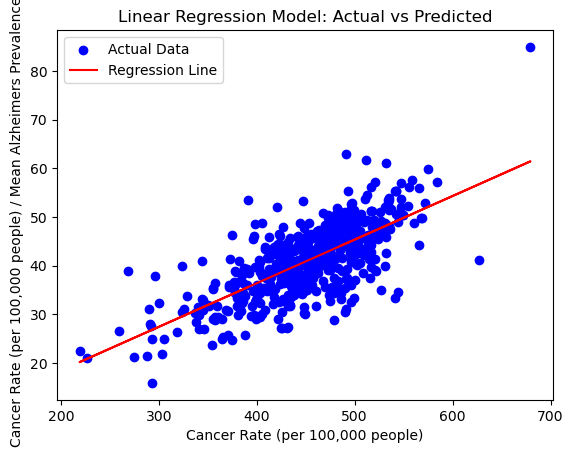

In [59]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plotting the regression line (using the predicted values)
plt.plot(X_test, Y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Cancer Rate (per 100,000 people)')
plt.ylabel('Cancer Rate (per 100,000 people) / Mean Alzheimers Prevalence%')
plt.title('Linear Regression Model: Actual vs Predicted')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [60]:
df[["Age 85 years or more, %", "Women, %", "Black or African American, %", "Hispanic, %", "Mean Prevalence%", "Mean Diagnosis Count", "Cancer Avg. Count", "Cancer Rate", "Relationship"]].corr(numeric_only=True)

,"Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,Mean Diagnosis Count,Cancer Avg. Count,Cancer Rate,Relationship
"Age 85 years or more, %",1.000000,0.200199,-0.122104,0.002249,0.466916,0.041216,0.029071,0.038766,-0.325929
"Women, %",0.200199,1.000000,0.470236,-0.029896,0.505178,0.208330,0.225082,0.259658,-0.161138
"Black or African American, %",-0.122104,0.470236,1.000000,-0.094038,0.713108,0.081588,0.073197,0.102202,-0.378247
"Hispanic, %",0.002249,-0.029896,-0.094038,1.000000,0.318377,0.160707,0.140478,-0.276450,-0.383775
Mean Prevalence%,0.466916,0.505178,0.713108,0.318377,1.000000,0.138405,0.112406,0.014907,-0.649649
Mean Diagnosis Count,0.041216,0.208330,0.081588,0.160707,0.138405,1.000000,0.987890,-0.051180,-0.128711
Cancer Avg. Count,0.029071,0.225082,0.073197,0.140478,0.112406,0.987890,1.000000,-0.028213,-0.097604
Cancer Rate,0.038766,0.259658,0.102202,-0.276450,0.014907,-0.051180,-0.028213,1.000000,0.734549
Relationship,-0.325929,-0.161138,-0.378247,-0.383775,-0.649649,-0.128711,-0.097604,0.734549,1.000000


In [61]:
from sklearn.linear_model import LinearRegression
np.random.seed(0)
model = LinearRegression()
# X is alzheimers, Y is cancer
ind = ["Hispanic, %", "Mean Prevalence%"]
dep = "Cancer Rate"
model = model.fit(df[ind], df[dep])
df["Cancer Rate Prediction"] = model.predict(df[ind])
df["Cancer Rate Error"] = df["Cancer Rate"] - df["Cancer Rate Prediction"]
df["Abs Cancer Rate Error"] = abs(df["Cancer Rate Error"])

In [62]:
df["Abs Cancer Rate Error"].describe()

count    2930.000000
mean       41.944710
std        38.944216
min         0.010864
25%        15.238344
50%        33.492185
75%        56.405273
max       792.889699
Name: Abs Cancer Rate Error, dtype: float64

<Axes: xlabel='Hispanic, %', ylabel='Cancer Rate Prediction'>

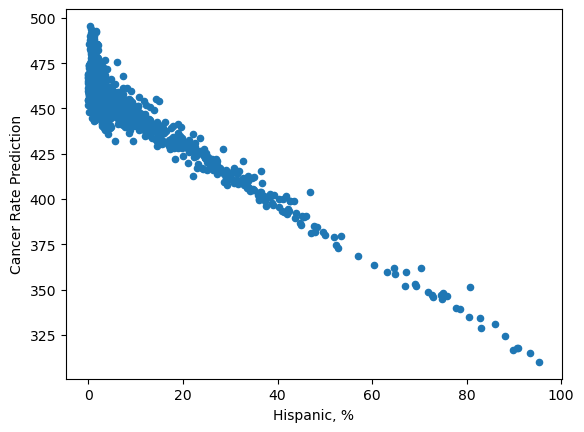

In [63]:
df.plot.scatter(x="Hispanic, %", y="Cancer Rate Prediction")

<Axes: xlabel='Hispanic, %', ylabel='Cancer Rate'>

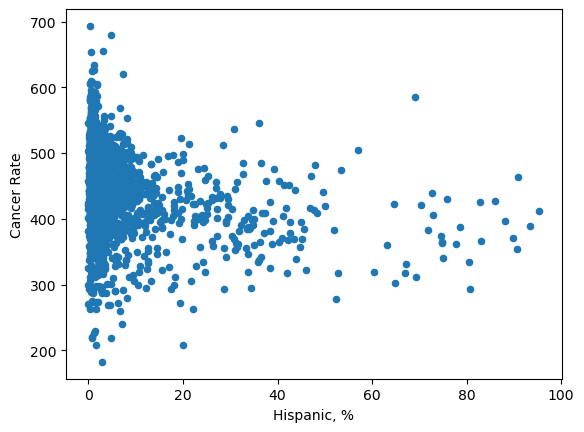

In [88]:
df[df["Cancer Rate"] < 800].plot.scatter(x="Hispanic, %", y="Cancer Rate")

/opt/anaconda3/envs/data-dive/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


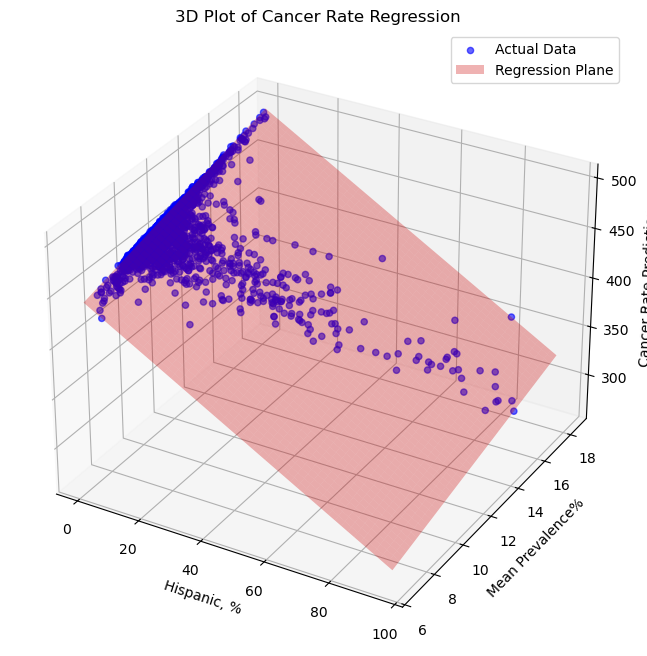

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extract columns from the DataFrame
x1 = df["Hispanic, %"]
x2 = df["Mean Prevalence%"]
y = df["Cancer Rate Prediction"]
y_pred = df["Cancer Rate Prediction"]

# Create a 3D scatter plot for the actual data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1, x2, y, c='blue', label='Actual Data', alpha=0.6)

# Overlay the regression plane
# Create a grid for independent variables
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50), 
                               np.linspace(x2.min(), x2.max(), 50))

# Predict values for the grid using your regression coefficients
# Assuming you know the coefficients of your regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[["Hispanic, %", "Mean Prevalence%"]], y)
y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, color='red', label="Regression Plane")

# Customize the plot
ax.set_xlabel("Hispanic, %")
ax.set_ylabel("Mean Prevalence%")
ax.set_zlabel("Cancer Rate Prediction")
plt.title("3D Plot of Cancer Rate Regression")
ax.legend(loc="best")
plt.show()


/opt/anaconda3/envs/data-dive/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


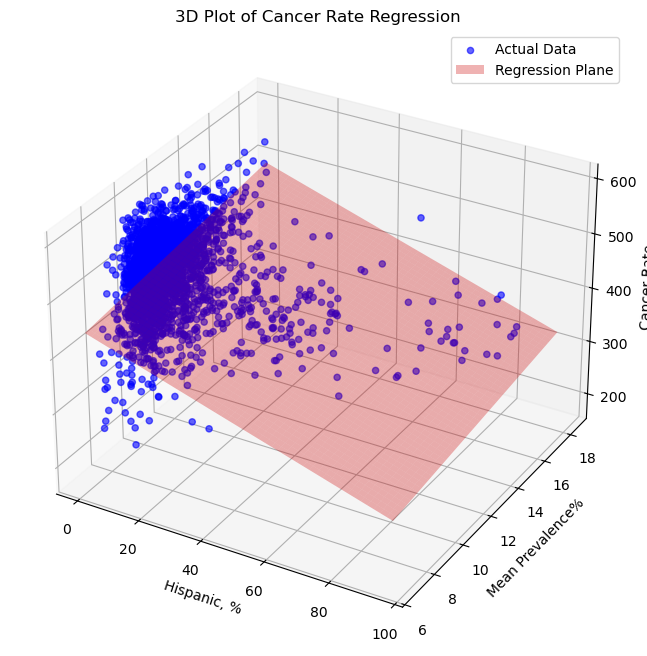

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extract columns from the DataFrame
x1 = df["Hispanic, %"][df["Cancer Rate"] < 600]
x2 = df["Mean Prevalence%"][df["Cancer Rate"] < 600]
y = df["Cancer Rate"][df["Cancer Rate"] < 600]
y_pred = df["Cancer Rate Prediction"][df["Cancer Rate"] < 600]

# Create a 3D scatter plot for the actual data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1, x2, y, c='blue', label='Actual Data', alpha=0.6)

# Overlay the regression plane
# Create a grid for independent variables
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50), 
                               np.linspace(x2.min(), x2.max(), 50))

# Predict values for the grid using your regression coefficients
# Assuming you know the coefficients of your regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[["Hispanic, %", "Mean Prevalence%"]][df["Cancer Rate"] < 600], y)
y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, color='red', label="Regression Plane")

# Customize the plot
ax.set_xlabel("Hispanic, %")
ax.set_ylabel("Mean Prevalence%")
ax.set_zlabel("Cancer Rate")
plt.title("3D Plot of Cancer Rate Regression")
ax.legend(loc="best")
plt.show()


                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04485
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.832
Time:                        19:48:45   Log-Likelihood:                -12821.
No. Observations:                2320   AIC:                         2.565e+04
Df Residuals:                    2318   BIC:                         2.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  454.2619 

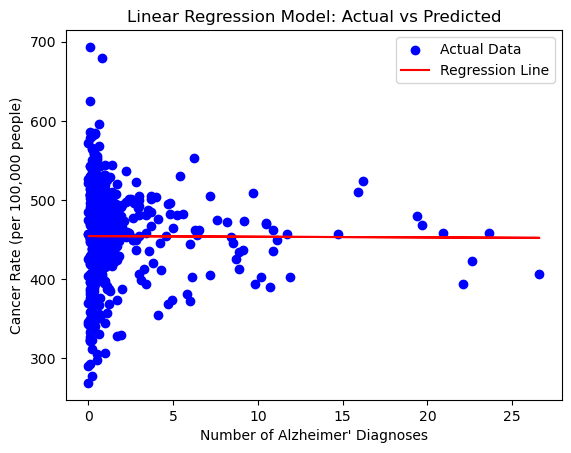

In [67]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
# X is alzheimers, Y is cancer
df_idk = df[df["Mean Diagnosis Count"] < df["Mean Diagnosis Count"].quantile(0.99)]
X_train, X_test = train_test_split(df_idk["Mean Diagnosis Count"], train_size=0.8, test_size=0.2, random_state=10)
Y_train, Y_test = train_test_split(df_idk["Cancer Rate"], train_size=0.8, test_size=0.2, random_state=10)

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(Y_train, X_train_lm).fit()

print(lr.summary())

Y_pred = lr.predict(X_test_lm)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared
corr = df_idk[["Mean Diagnosis Count", "Cancer Rate"]].corr().iat[0, 1]

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Correlation Coefficient", corr)

plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plotting the regression line (using the predicted values)
plt.plot(X_test, Y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Number of Alzheimer\' Diagnoses')
plt.ylabel('Cancer Rate (per 100,000 people)')
plt.title('Linear Regression Model: Actual vs Predicted')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Prevalence%   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.77
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000612
Time:                        19:48:45   Log-Likelihood:                -4138.3
No. Observations:                2320   AIC:                             8281.
Df Residuals:                    2318   BIC:                             8292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0731      0.03

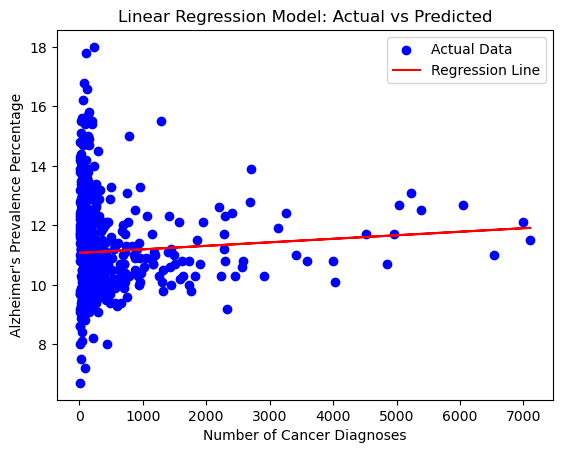

In [68]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
# X is alzheimers, Y is cancer
df_idk = df[df["Cancer Avg. Count"] < df["Cancer Avg. Count"].quantile(0.99)]
X_train, X_test = train_test_split(df_idk["Cancer Avg. Count"], train_size=0.8, test_size=0.2, random_state=10)
Y_train, Y_test = train_test_split(df_idk["Mean Prevalence%"], train_size=0.8, test_size=0.2, random_state=10)

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(Y_train, X_train_lm).fit()

print(lr.summary())

Y_pred = lr.predict(X_test_lm)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared
corr = df_idk[["Mean Diagnosis Count", "Cancer Rate"]].corr().iat[0, 1]

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Correlation Coefficient", corr)

plt.scatter(X_test, Y_test, color='blue', label='Actual Data')

# Plotting the regression line (using the predicted values)
plt.plot(X_test, Y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Number of Cancer Diagnoses')
plt.ylabel('Alzheimer\'s Prevalence Percentage')
plt.title('Linear Regression Model: Actual vs Predicted')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [69]:
df.columns

Index(['County', 'FIPS', 'No. of people age 65y and older, in thousands',
       'Prevalence, % (95%CI)', 'No. (95%CI) of people with AD, in thousands',
       'Age 85 years or more, %', 'Women, %', 'Black or African American, %',
       'Hispanic, %', 'Mean Prevalence%', '95% CI Low Prevalence%',
       '95% CI High Prevalence%', 'Mean Diagnosis Count',
       '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count', 'name',
       'state', 'Cancer Avg. Count', 'Cancer Rate', 'Relationship',
       'Cancer Rate Prediction', 'Cancer Rate Error', 'Abs Cancer Rate Error'],
      dtype='object')

In [70]:
df_hi = df[df.state == "Hawaii"]
df_hi

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,95% CI Low Prevalence%,95% CI High Prevalence%,Mean Diagnosis Count,95% CI Low Diagnosis Count,95% CI High Diagnosis Count,name,state,Cancer Avg. Count,Cancer Rate,Relationship,Cancer Rate Prediction,Cancer Rate Error,Abs Cancer Rate Error
542,"Hawaii County, Hawaii",15001,45.8,"9.9 (9.3, 10.5)","4.5 (4.3, 4.8)",11.4,51.9,0.7,4.4,9.9,9.3,10.5,4.5,4.3,4.8,Hawaii County,Hawaii,1201.0,412.1,41.626263,449.238480,-37.138480,37.138480
543,"Honolulu County, Hawaii",15003,181.1,"12 (11.4, 12.6)","21.7 (20.6, 22.8)",17.1,55.7,1.0,2.5,12.0,11.4,12.6,21.7,20.6,22.8,Honolulu County,Hawaii,5217.0,407.8,33.983333,462.505203,-54.705203,54.705203
544,"Kauai County, Hawaii",15007,15.3,"10.6 (10, 11.2)","1.6 (1.5, 1.7)",13.3,53.5,0.7,4.4,10.6,10.0,11.2,1.6,1.5,1.7,Kauai County,Hawaii,387.0,372.1,35.103774,452.520076,-80.420076,80.420076
545,"Maui County, Hawaii",15009,32.8,"10.2 (9.6, 10.8)","3.3 (3.2, 3.5)",11.8,53.0,0.7,4.4,10.2,9.6,10.8,3.3,3.2,3.5,Maui County,Hawaii,908.0,414.5,40.637255,450.644878,-36.144878,36.144878


In [71]:
df[["County", "Cancer Rate", "Mean Prevalence%"]].nlargest(20, "Cancer Rate")

,County,Cancer Rate,Mean Prevalence%
378,"Union County, Florida",1248.4,10.7
1189,"Traverse County, Minnesota",693.5,12.8
2497,"Polk County, Texas",679.5,8.0
2716,"Galax City, Virginia",655.0,12.9
1488,"Greeley County, Nebraska",653.1,12.9
2172,"Dewey County, South Dakota",634.5,9.8
1258,"Quitman County, Mississippi",626.5,15.2
1449,"Wheatland County, Montana",626.0,10.3
2176,"Faulk County, South Dakota",625.3,12.3
2527,"Stonewall County, Texas",621.1,12.9


In [72]:
df[["County", "Cancer Rate", "Mean Prevalence%"]].nlargest(20, "Cancer Rate").describe()

,Cancer Rate,Mean Prevalence%
count,20.000000,20.000000
mean,653.730000,11.220000
std,142.847483,1.934343
min,592.100000,8.000000
25%,604.700000,10.025000
50%,615.200000,10.600000
75%,639.150000,12.825000
max,1248.400000,15.200000


In [73]:
df[["County", "Cancer Rate", "Mean Prevalence%"]].nsmallest(20, "Cancer Rate")

,County,Cancer Rate,Mean Prevalence%
269,"Hinsdale County, Colorado",182.3,9.0
282,"Mineral County, Colorado",207.4,9.2
2435,"Jeff Davis County, Texas",208.0,10.4
1814,"Oliver County, North Dakota",219.0,9.7
67,"Aleutians East Borough, Alaska",219.1,9.5
1070,"Keweenaw County, Michigan",220.9,9.1
2009,"Gilliam County, Oregon",226.4,10.8
1530,"Sioux County, Nebraska",228.6,12.3
1934,"Cimarron County, Oklahoma",239.6,10.7
229,"Sierra County, California",259.6,9.8


In [74]:
df[["County", "Cancer Rate", "Mean Prevalence%"]].nsmallest(20, "Cancer Rate").describe()

,Cancer Rate,Mean Prevalence%
count,20.000000,20.000000
mean,245.010000,10.285000
std,28.477635,1.634263
min,182.300000,6.900000
25%,220.450000,9.175000
50%,261.250000,10.350000
75%,269.425000,10.825000
max,274.100000,13.900000


In [75]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [76]:
df_large = df[df["Cancer Rate"] > df["Cancer Rate"].quantile(0.8)]
df_small = df[df["Cancer Rate"] > df["Cancer Rate"].quantile(0.2)]

In [77]:
zstat, pvalue = ztest(x1=df_large["Mean Prevalence%"], x2=df_small["Mean Prevalence%"], value=0, alternative="two-sided")
print("z stat: ", zstat)
print("pvalue: ", pvalue)

z stat:  -1.2421076448633837
pvalue:  0.21419684830540686


In [78]:
tstat, pval = ttest_ind(a=df_large["Mean Prevalence%"].sample(25), b=df_small["Mean Prevalence%"].sample(25))
print("T Statistic: ", tstat)
print("p-value: ", pval)

T Statistic:  -0.5156836383219497
p-value:  0.6084426121612709
